In [1]:
from foggie.utils.foggie_load import *
from foggie.utils.consistency import *
from foggie.clumps.clump_finder import *

In [2]:
code_dir = '/Users/ctrapp/Documents/GitHub/foggie/'
data_dir = '/Volumes/FoggieCam/foggie_halos/'

gal_id = "008508";snapnum = "RD0042"; ##Tempest

snap_name = data_dir + "halo_"+gal_id+"/nref11c_nref9f/"+snapnum+"/"+snapnum
trackname = code_dir+"/foggie/halo_tracks/"+gal_id+"/nref11n_selfshield_15/halo_track_200kpc_nref9"
halo_c_v_name = code_dir+"/foggie/halo_infos/"+gal_id+"/nref11c_nref9f/halo_c_v"

particle_type_for_angmom = 'gas' #Should be defined by gas with Temps below 1e4 K

catalog_dir = code_dir + 'foggie/halo_infos/' + gal_id + '/nref11c_nref9f/'
#smooth_AM_name = catalog_dir + 'AM_direction_smoothed'
smooth_AM_name = None

ds, refine_box = foggie_load(snap_name, trackname, halo_c_v_name=halo_c_v_name, do_filter_particles=True,disk_relative=True,particle_type_for_angmom=particle_type_for_angmom,smooth_AM_name = smooth_AM_name)

print("Current time = ",ds.current_time)
print("Current redshift = ",ds.current_redshift)

Opening snapshot /Volumes/FoggieCam/foggie_halos/halo_008508/nref11c_nref9f/RD0042/RD0042


yt : [INFO     ] 2025-03-20 15:55:04,645 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2025-03-20 15:55:04,645 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2025-03-20 15:55:04,645 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-20 15:55:04,645 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-03-20 15:55:04,646 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-03-20 15:55:04,646 Parameters: current_redshift          = 0
yt : [INFO     ] 2025-03-20 15:55:04,646 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2025-03-20 15:55:04,646 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2025-03-20 15:55:04,646 Parameters: omega_radiation           = 0
yt : [INFO     ] 2025-03-20 15:55:04,647 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9


Parsing Hierarchy : 100%|████████████████| 4251/4251 [00:00<00:00, 30350.41it/s]
yt : [INFO     ] 2025-03-20 15:55:04,852 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file
filtering young_stars particles...
filtering young_stars3 particles...
filtering young_stars8 particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...
using particle type  gas  to derive angular momentum
found angular momentum vector
Current time =  639.44480357087 code_time
Current redshift =  0


In [3]:
####Find all the clumps in the refine box####
#### For tempest at z=0 takes around 5 mins on macbook M4-Max (16 cores, 4.51 GHz clock speed)

args = get_default_args() #Get the default arguments without needing to parse_args
print(args)
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
args.clump_min = 1.3e-30
master_clump = clump_finder(args,ds,refine_box) #Returns the clump tree and saves to args.output

Namespace(refinement_level=None, halo='008508', snapshot='RD0042', run='nref11c_nref9f', output='./output/clump_test', clump_min=None, clump_max=None, step=2, mask_disk=False, min_cells=20, nthreads=None, Nsubarrays=64, clumping_field='density', clumping_field_type='gas', only_save_leaves=False, code_dir=None, data_dir=None, include_diagonal_neighbors=False, identify_disk=False, cgm_density_cut_type='relative_density', cgm_density_factor=None, max_void_size=0, max_disk_void_size=2000, max_disk_hole_size=2000, run_mc_parallel=False, run_mapping_linearly=False, system=None, pwd=False, forcepath=False, cut_radius=None, skip_saving_clumps=False, n_dilation_iterations=0, n_cells_per_dilation=1, closing_iterations=1, use_cylindrical_connectivity_matrix=False, save_clumps_individually=False)


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:196: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to 1.3e-30
Clump_min is set to 1.3e-30
Clump max set to 5.379342241837713e-23 g/cm**3
n_levels= 26
Defining ucgs...


yt : [WARNING  ] 2025-03-20 15:55:18,788 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


Iterating for clump threshold= 1.3e-30
Marching cubes...
Time to march cubes linearly= 5.119038820266724
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...


/opt/anaconda3/envs/foggie/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Combining clump id sublists...
Time for parallel clump mapping= 19.163188219070435


Adding Children: 100%|██████████████████████████| 13/13 [00:00<00:00, 13.03it/s]


Iterating for clump threshold= 2.6e-30
Marching cubes...
Time to march cubes linearly= 5.2537901401519775
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 13.174740076065063


Adding Children: 100%|██████████████████████████| 67/67 [00:01<00:00, 54.46it/s]


Iterating for clump threshold= 5.2e-30
Marching cubes...
Time to march cubes linearly= 4.955809831619263
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 12.57629680633545


Adding Children: 100%|████████████████████████| 280/280 [00:03<00:00, 89.07it/s]


Iterating for clump threshold= 1.04e-29
Marching cubes...
Time to march cubes linearly= 4.425623178482056
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 9.93825387954712


Adding Children: 100%|███████████████████████| 590/590 [00:05<00:00, 115.31it/s]


Iterating for clump threshold= 2.08e-29
Marching cubes...
Time to march cubes linearly= 3.976490020751953
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 7.456721782684326


Adding Children: 100%|████████████████████████| 565/565 [00:15<00:00, 36.89it/s]


Iterating for clump threshold= 4.16e-29
Marching cubes...
Time to march cubes linearly= 3.625431776046753
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 7.058940887451172


Adding Children: 100%|████████████████████████| 479/479 [00:08<00:00, 57.28it/s]


Iterating for clump threshold= 8.32e-29
Marching cubes...
Time to march cubes linearly= 3.4723830223083496
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 6.0219972133636475


Adding Children: 100%|████████████████████████| 384/384 [00:05<00:00, 74.47it/s]


Iterating for clump threshold= 1.664e-28
Marching cubes...
Time to march cubes linearly= 3.378710985183716
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.260054111480713


Adding Children: 100%|███████████████████████| 403/403 [00:03<00:00, 103.41it/s]


Iterating for clump threshold= 3.328e-28
Marching cubes...
Time to march cubes linearly= 3.3178677558898926
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.190056085586548


Adding Children: 100%|███████████████████████| 320/320 [00:01<00:00, 180.41it/s]


Iterating for clump threshold= 6.656e-28
Marching cubes...
Time to march cubes linearly= 3.3484551906585693
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.101810932159424


Adding Children: 100%|███████████████████████| 292/292 [00:01<00:00, 233.44it/s]


Iterating for clump threshold= 1.3312e-27
Marching cubes...
Time to march cubes linearly= 3.314451217651367
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.115550994873047


Adding Children: 100%|███████████████████████| 326/326 [00:01<00:00, 295.04it/s]


Iterating for clump threshold= 2.6624e-27
Marching cubes...
Time to march cubes linearly= 3.28079891204834
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.1500139236450195


Adding Children: 100%|███████████████████████| 392/392 [00:00<00:00, 543.79it/s]


Iterating for clump threshold= 5.3248e-27
Marching cubes...
Time to march cubes linearly= 3.3285441398620605
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.100237131118774


Adding Children: 100%|██████████████████████| 382/382 [00:00<00:00, 1456.70it/s]


Iterating for clump threshold= 1.06496e-26
Marching cubes...
Time to march cubes linearly= 3.2882637977600098
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.166479825973511


Adding Children: 100%|██████████████████████| 175/175 [00:00<00:00, 2695.71it/s]

Iterating for clump threshold= 2.12992e-26
Marching cubes...


Time to march cubes linearly= 3.307943105697632
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.151425123214722


Adding Children: 100%|████████████████████████| 68/68 [00:00<00:00, 3316.58it/s]

Iterating for clump threshold= 4.25984e-26
Marching cubes...


Time to march cubes linearly= 3.2768850326538086
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.098506927490234


Adding Children: 100%|████████████████████████| 40/40 [00:00<00:00, 2660.47it/s]

Iterating for clump threshold= 8.51968e-26
Marching cubes...


Time to march cubes linearly= 3.291947603225708
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.15332293510437


Adding Children: 100%|████████████████████████| 28/28 [00:00<00:00, 3220.99it/s]

Iterating for clump threshold= 1.703936e-25
Marching cubes...


Time to march cubes linearly= 3.2956151962280273
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.14750075340271


Adding Children: 100%|████████████████████████| 33/33 [00:00<00:00, 3058.76it/s]

Iterating for clump threshold= 3.407872e-25
Marching cubes...


Time to march cubes linearly= 3.2913742065429688
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.0917510986328125


Adding Children: 100%|████████████████████████| 54/54 [00:00<00:00, 5601.67it/s]

Iterating for clump threshold= 6.815744e-25
Marching cubes...


Time to march cubes linearly= 3.2830088138580322
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.128692865371704


Adding Children: 100%|████████████████████████| 55/55 [00:00<00:00, 6874.06it/s]

Iterating for clump threshold= 1.3631488e-24
Marching cubes...


Time to march cubes linearly= 3.294843912124634
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.1317338943481445


Adding Children: 100%|████████████████████████| 68/68 [00:00<00:00, 8147.77it/s]

Iterating for clump threshold= 2.7262976e-24
Marching cubes...


Time to march cubes linearly= 3.2868268489837646
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.135120868682861


Adding Children: 100%|████████████████████████| 48/48 [00:00<00:00, 9406.03it/s]

Iterating for clump threshold= 5.4525952e-24
Marching cubes...


Time to march cubes linearly= 3.3200080394744873
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.215701103210449


Adding Children: 100%|███████████████████████| 67/67 [00:00<00:00, 30665.47it/s]

Iterating for clump threshold= 1.09051904e-23
Marching cubes...


Time to march cubes linearly= 3.294440984725952
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.108567953109741


Adding Children: 100%|███████████████████████| 40/40 [00:00<00:00, 30604.19it/s]

Iterating for clump threshold= 2.18103808e-23
Marching cubes...


Time to march cubes linearly= 3.3497471809387207
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.091061115264893


Adding Children: 100%|█████████████████████████| 2/2 [00:00<00:00, 28532.68it/s]

No clumps found at this threshold...terminating
Saving Clump Hierarchy...
Creating group for 27
Appending root...
Creating group for 135
Appending leaf...
Appending root...
Creating group for 243
Appending leaf...
Appending root...
Creating group for 270
Appending leaf...
Appending root...
Creating group for 28
Creating group for 163
Appending leaf...
Creating group for 1324
Appending leaf...
Creating group for 1594
Appending leaf...
Creating group for 1675
Appending leaf...
Creating group for 29
Creating group for 56
Appending leaf...
Creating group for 83
Appending leaf...
Creating group for 137
Appending leaf...
Creating group for 191
Appending leaf...
Creating group for 353
Appending leaf...
Creating group for 569
Appending leaf...
Creating group for 704
Appending leaf...
Creating group for 839
Appending leaf...
Creating group for 1028
Appending leaf...
Creating group for 1298
Appending leaf...
Creating group for 1568
Appending leaf...
Creating group for 1757
Appending leaf...
Crea

Appending leaf...
Creating group for 6379
Creating group for 6406
Appending leaf...
Creating group for 6460
Appending leaf...
Creating group for 6892
Creating group for 6919
Creating group for 7243
Creating group for 7297
Appending leaf...
Creating group for 7351
Creating group for 7567
Creating group for 7729
Creating group for 7783
Creating group for 7837
Appending leaf...
Creating group for 7891
Appending leaf...
Creating group for 7972
Appending leaf...
Creating group for 7999
Creating group for 8026
Creating group for 8053
Creating group for 8080
Appending leaf...
Creating group for 8161
Appending leaf...
Creating group for 8188
Creating group for 8215
Creating group for 8242
Creating group for 8377
Creating group for 8404
Creating group for 8431
Creating group for 8458
Creating group for 8485
Appending leaf...
Creating group for 8647
Appending leaf...
Creating group for 8674
Appending leaf...
Creating group for 8701
Appending leaf...
Creating group for 8755
Creating group for 878

yt : [INFO     ] 2025-03-20 16:00:22,910 Saving field data to yt dataset: /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTestYTClumpDataset.h5.


YTClumpTest is: <foggie.clumps.clump_finder.utils_clump_finder.YTClumpLean object at 0x31a3ef9b0>
For 15 threads total time= 317.3715682029724


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:196: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
Loading Leaves...: 100%|█████████████████████| 957/957 [00:03<00:00, 304.75it/s]
yt : [WARNING  ] 2025-03-20 16:01:12,545 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-03-20 16:01:21,126 Projection completed
yt : [INFO     ] 2025-03-20 16:01:21,127 xlim = 0.489155 0.490545
yt : [INFO     ] 2025-03-20 16:01:21,127 ylim = 0.470501 0.471891
yt : [INFO     ] 2025-03-20 16:01:21,128 xlim = 0.489155 0.490545
yt : [INFO     ] 2025-03-20 16:01:21,128 ylim = 0.470501 0.471891
yt : [INFO     ] 2025-03-20 16:01:21,128 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



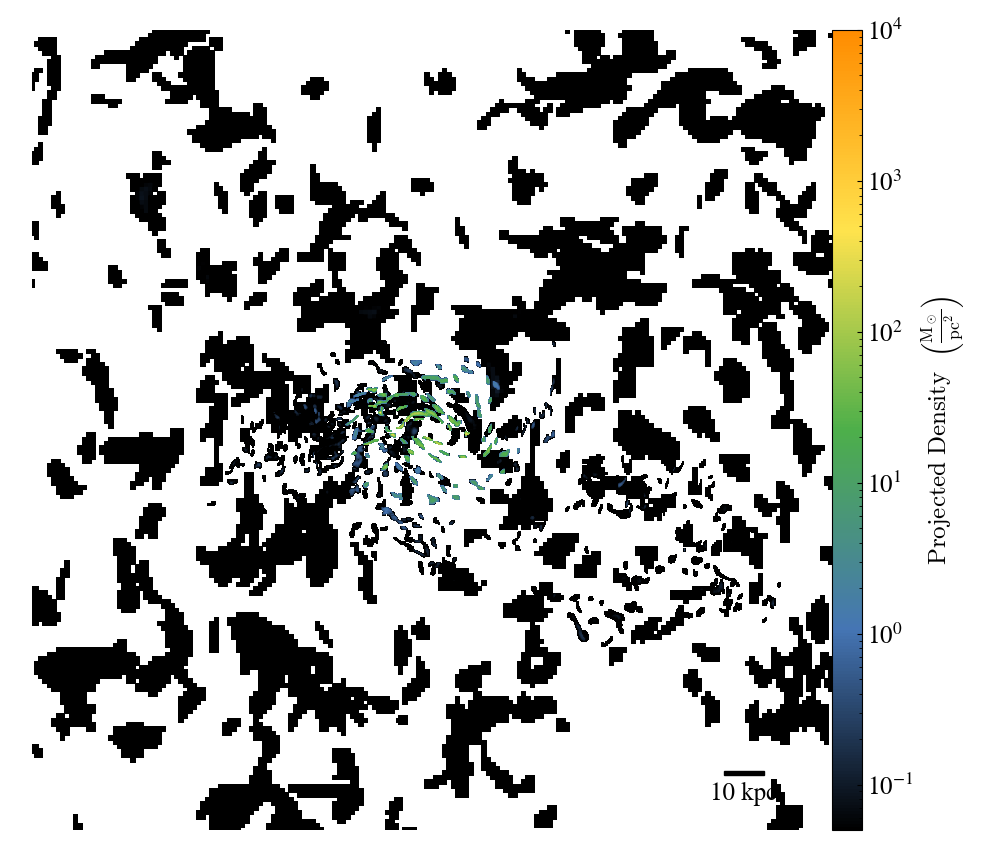

In [5]:
#Load in all the leaf clumps (no children) as a single cut region
leaf_clumps = load_all_leaves(ds, args.output+"_ClumpTree.h5")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=leaf_clumps, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


In [3]:
#### Find the Disk ####
#### For tempest at z=0 takes around 1 min on macbook M4-Max (16 cores, 4.51 GHz clock speed)
args = get_default_args()
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
args.identify_disk = True #Run as a disk finder

args.fill_by_closing = True
args.cgm_density_factor = 5.
args.max_disk_void_size = np.round( (5. / 0.274)**3. ).astype(int)
args.max_disk_hole_size = int(np.round(7./0.274)) #~36
args.closing_iterations = 1
args.n_dilation_iterations = 10 #Dilate the disk mask 10 times by 1 cell each (at nref 11 -> ~2.74 kpc, each shell was a width of 0.274 kpc)
args.n_cells_per_dilation = 1
args.clumping_field = "H_p0_number_density"
disk_file = args.output + "_Disk.h5"



disk = clump_finder(args,ds,refine_box)

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:195: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
cgm_density_cut was: 0.00016203896449999998 cm**(-3) stdv= 7.86000607818492e-07 cm**(-3)
cgm_density_cut= 0.00024063902528184916 cm**(-3) clump_max= 24.282430865535172 cm**(-3) min_val= 8.53247328094966e-16 cm**(-3)
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-03-10 09:35:39,149 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


Iterating for clump threshold= 0.00024063902528184916 cm**(-3)
Marching cubes...
Time to march cubes linearly= 5.338140249252319
Updating clump catalog...
disk_label set to: 106
Cataloging and filling in disk...
Void filling filled 198 cells in 3d cavities.
Binary closing filled 531801 cells.
Void filling after binary closing filled 0 cells in 3d cavities.
Saving filled holes at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_FilledDiskHoles.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_DiskDilationShell_n0.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_DiskDilationShell_n1.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_DiskDilationShell_n2.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_DiskDilationShell_n3.h5
Saving 

In [4]:
####Test using the files generated####
from foggie.clumps.clump_finder.utils_clump_finder import load_clump
from foggie.clumps.clump_finder.utils_clump_finder import mask_clump

disk_file = args.output+"_Disk.h5"
disk_cut = load_clump(ds, disk_file)

yt : [INFO     ] 2025-03-10 09:38:08,281 Projection completed
yt : [INFO     ] 2025-03-10 09:38:08,284 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-03-10 09:38:08,284 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-03-10 09:38:08,285 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-03-10 09:38:08,285 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-03-10 09:38:08,286 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



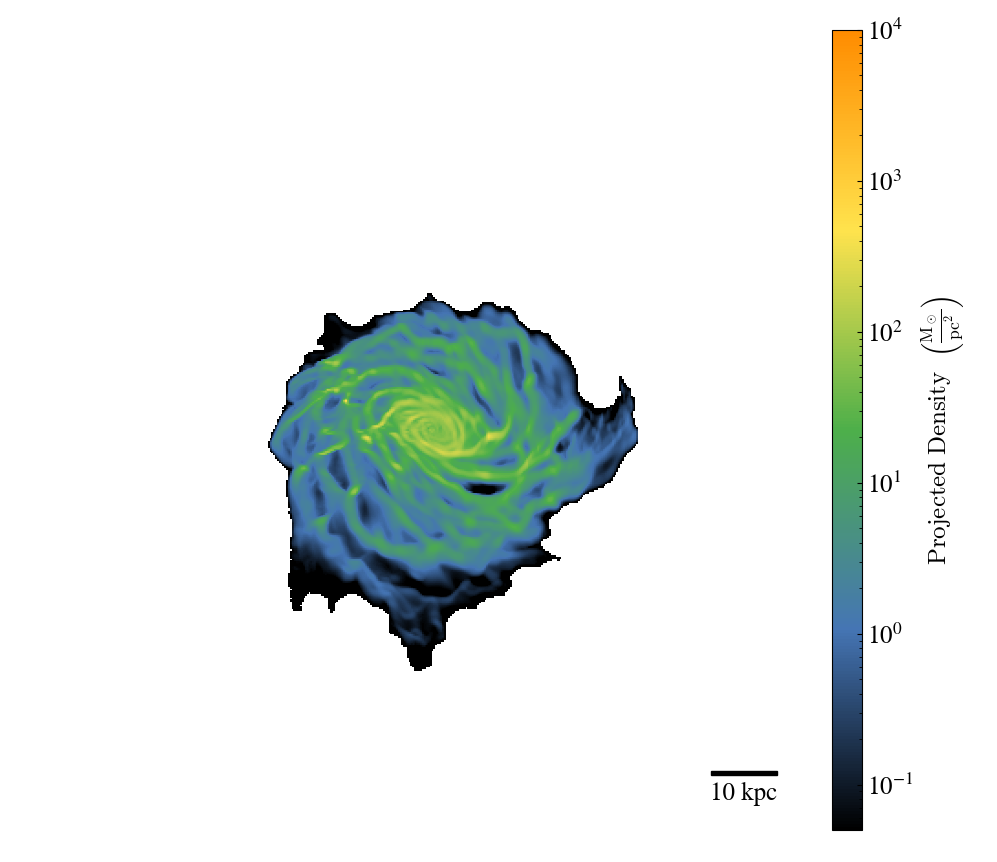

yt : [INFO     ] 2025-03-10 09:38:18,519 Projection completed
yt : [INFO     ] 2025-03-10 09:38:18,520 xlim = 0.509130 0.509964
yt : [INFO     ] 2025-03-10 09:38:18,520 ylim = 0.489433 0.490267
yt : [INFO     ] 2025-03-10 09:38:18,521 xlim = 0.509130 0.509964
yt : [INFO     ] 2025-03-10 09:38:18,521 ylim = 0.489433 0.490267
yt : [INFO     ] 2025-03-10 09:38:18,521 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



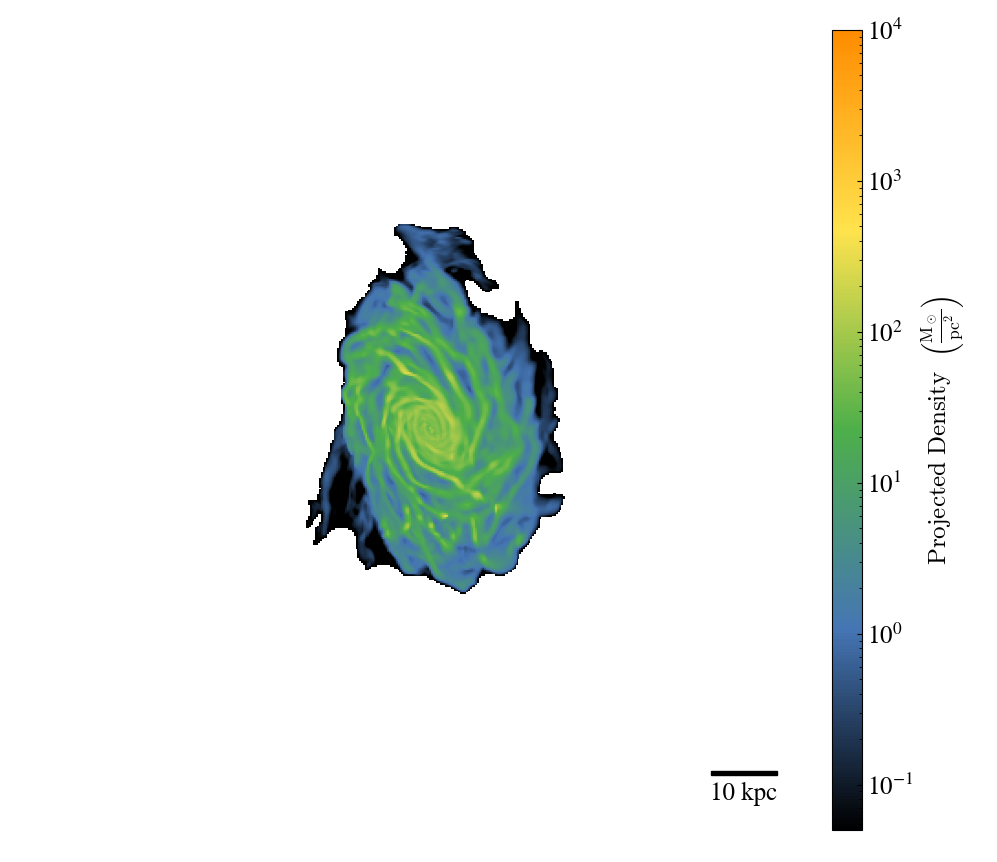

yt : [INFO     ] 2025-03-10 09:38:28,756 Projection completed
yt : [INFO     ] 2025-03-10 09:38:28,756 xlim = 0.470779 0.471613
yt : [INFO     ] 2025-03-10 09:38:28,756 ylim = 0.509130 0.509964
yt : [INFO     ] 2025-03-10 09:38:28,757 xlim = 0.470779 0.471613
yt : [INFO     ] 2025-03-10 09:38:28,757 ylim = 0.509130 0.509964
yt : [INFO     ] 2025-03-10 09:38:28,758 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



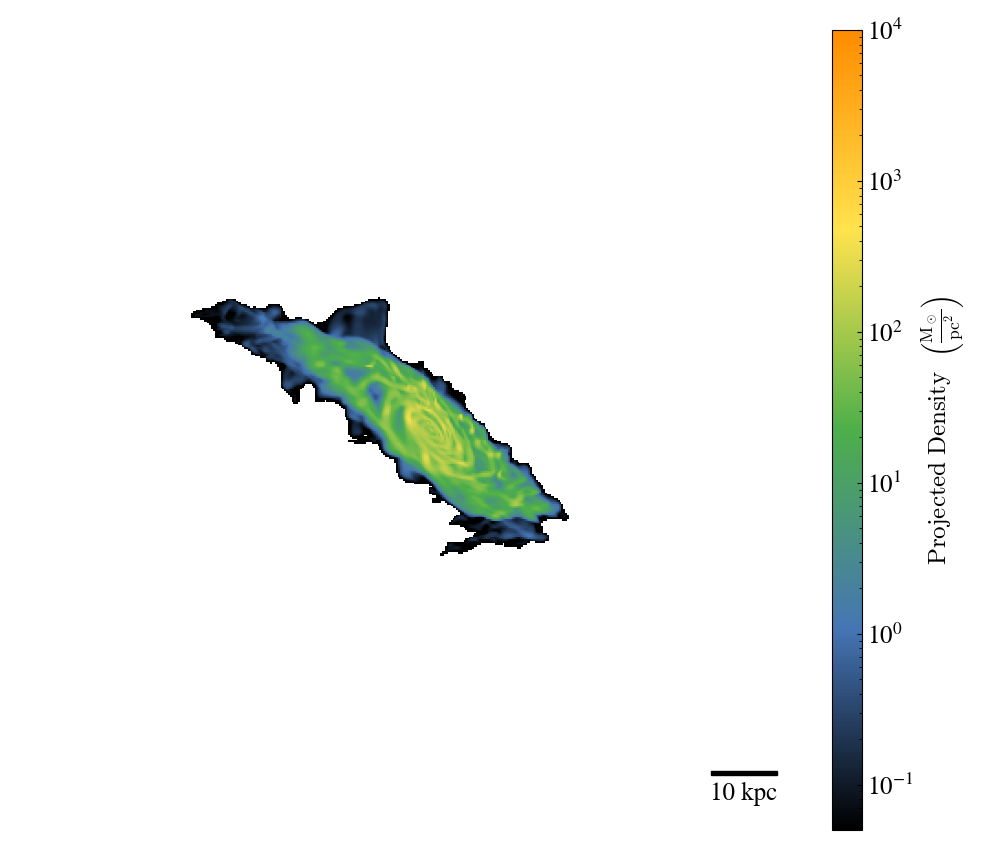

In [5]:

p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

p = yt.ProjectionPlot(ds, 'x', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:51:13,458 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:51:19,133 Projection completed
yt : [INFO     ] 2025-01-24 15:51:19,133 xlim = 0.489294 0.490406
yt : [INFO     ] 2025-01-24 15:51:19,133 ylim = 0.470640 0.471752
yt : [INFO     ] 2025-01-24 15:51:19,134 xlim = 0.489294 0.490406
yt : [INFO     ] 2025-01-24 15:51:19,135 ylim = 0.470640 0.471752
yt : [INFO     ] 2025-01-24 15:51:19,135 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



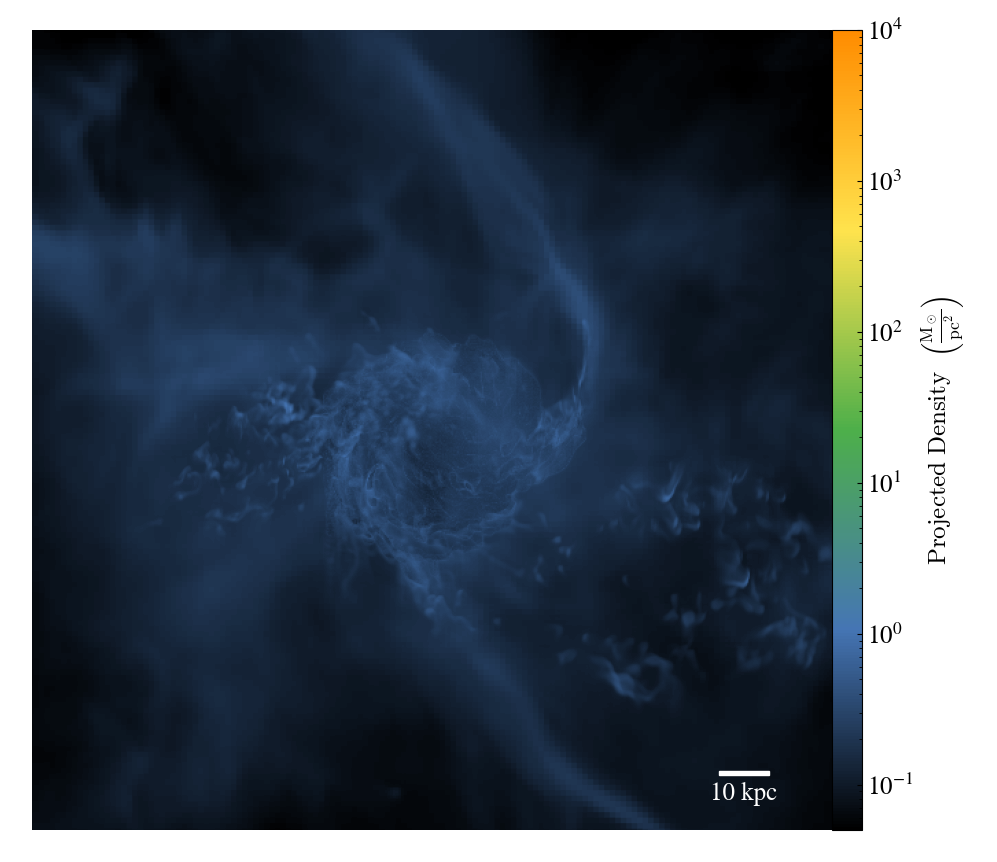

In [7]:

#### Get everything but the disk ####
cgm_cut = mask_clump(ds, disk_file, refine_box)
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source = cgm_cut, width=(160,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()


In [8]:
#### Find the Disk and additional shells around the disk ####
#### For tempest at z=0 takes around 1 min on macbook M4-Max (16 cores, 4.51 GHz clock speed)
args = get_default_args()
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1"
args.identify_disk = True #Run as a disk finder
args.n_dilation_iterations = 10 #Dilate the disk mask 10 times by 1 cell each (at nref 11 -> ~2.74 kpc, each shell was a width of 0.274 kpc)
args.n_cells_per_dilation = 1
#args.cgm_density_cut_type = 'comoving_density'
#args.cgm_density_factor = 0.4
args.cgm_density_factor = 200.
disk = clump_finder(args,ds,refine_box)

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-01-24 15:51:32,821 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


Iterating for clump threshold= 5.974045610420523e-27 g/cm**3
Marching cubes...
Time to march cubes linearly= 6.2627339363098145
Updating clump catalog...
disk_label set to: 128
Cataloging and filling in disk...
Void filling filled 183 cells in 3d cavities.
Hole filling along x-hat filled 2205 cells in 2d holes.
Hole filling along y-hat filled 3741 cells in 2d holes.
Hole filling along z-hat filled 12744 cells in 2d holes.
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_DiskDilationShell_n0.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_DiskDilationShell_n1.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_DiskDilationShell_n2.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_DiskDilationShell_n3.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_ana

Original Disk:


yt : [INFO     ] 2025-01-24 15:52:41,077 Projection completed
yt : [INFO     ] 2025-01-24 15:52:41,077 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:52:41,077 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:52:41,078 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:52:41,079 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:52:41,079 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



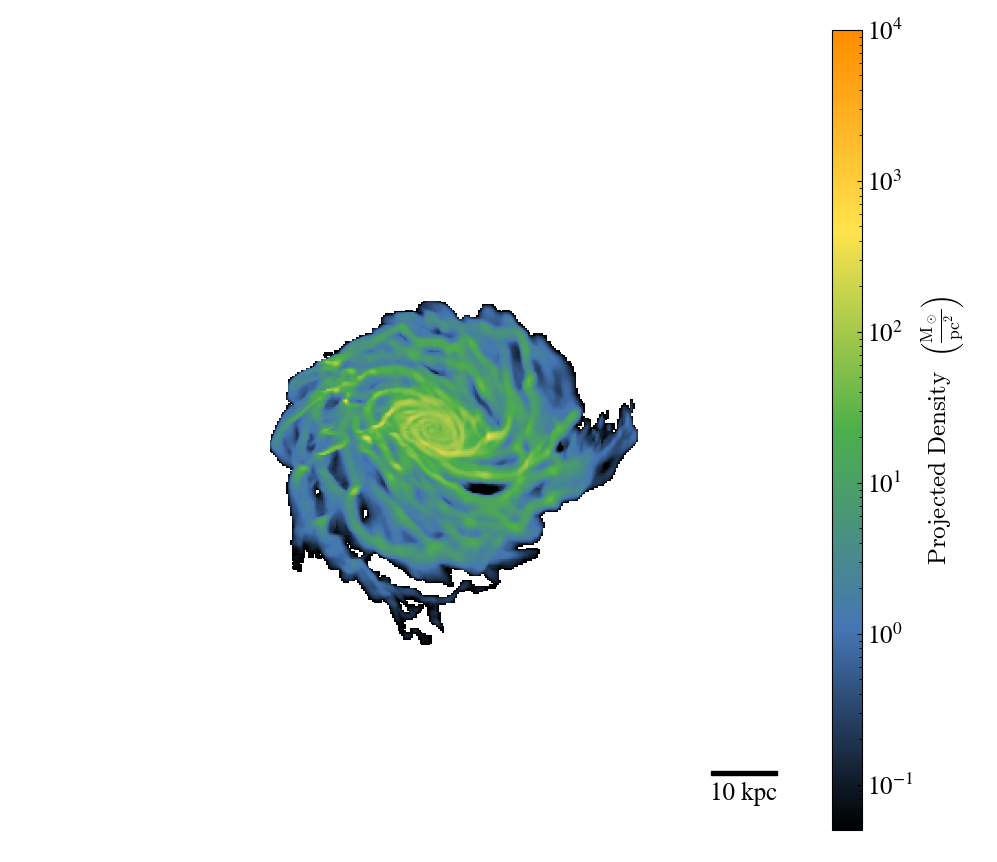

Loading Shell 0 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:52:44,175 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:52:51,644 Projection completed
yt : [INFO     ] 2025-01-24 15:52:51,645 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:52:51,645 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:52:51,646 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:52:51,646 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:52:51,646 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



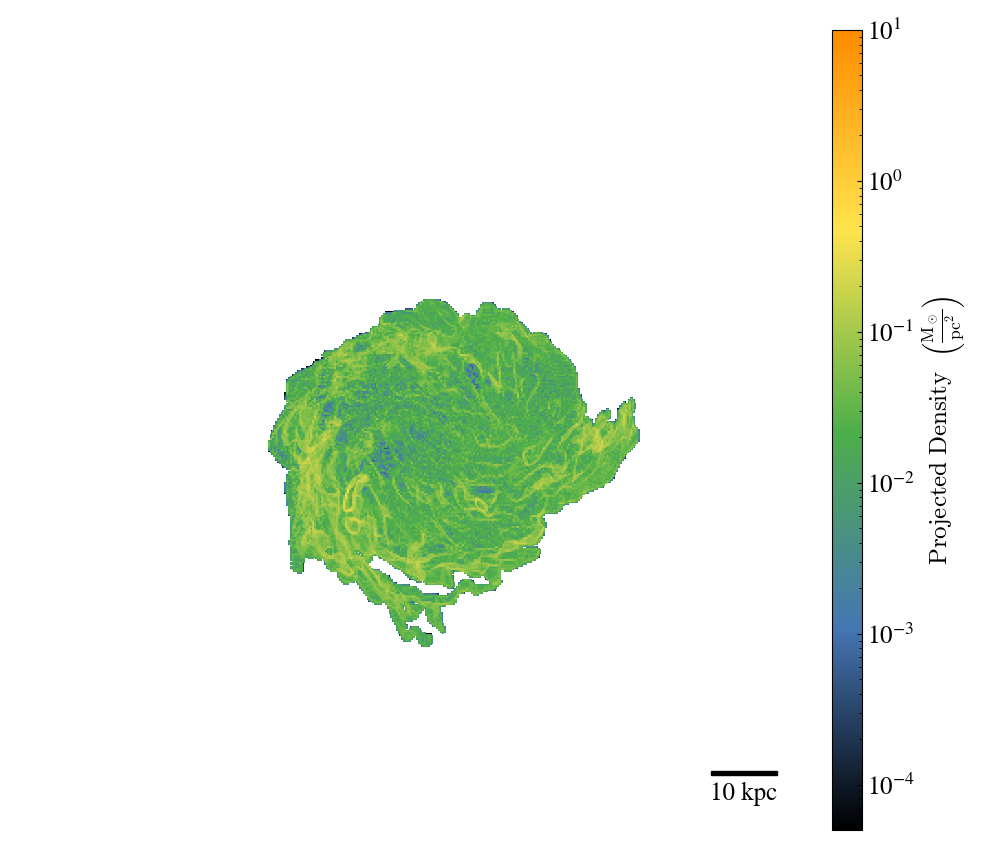

Loading Shell 1 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:53:08,178 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:53:15,477 Projection completed
yt : [INFO     ] 2025-01-24 15:53:15,477 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:15,478 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:15,479 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:15,479 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:15,479 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



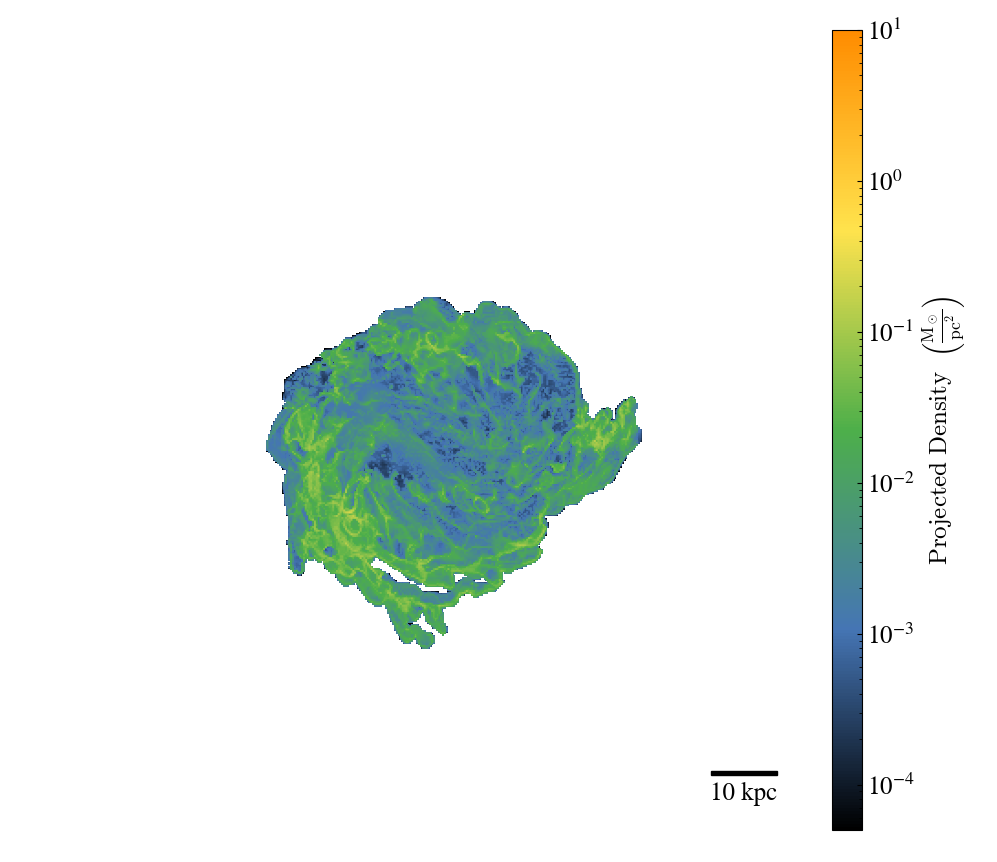

Loading Shell 2 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:53:25,820 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:53:33,254 Projection completed
yt : [INFO     ] 2025-01-24 15:53:33,255 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:33,255 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:33,256 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:33,256 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:33,256 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



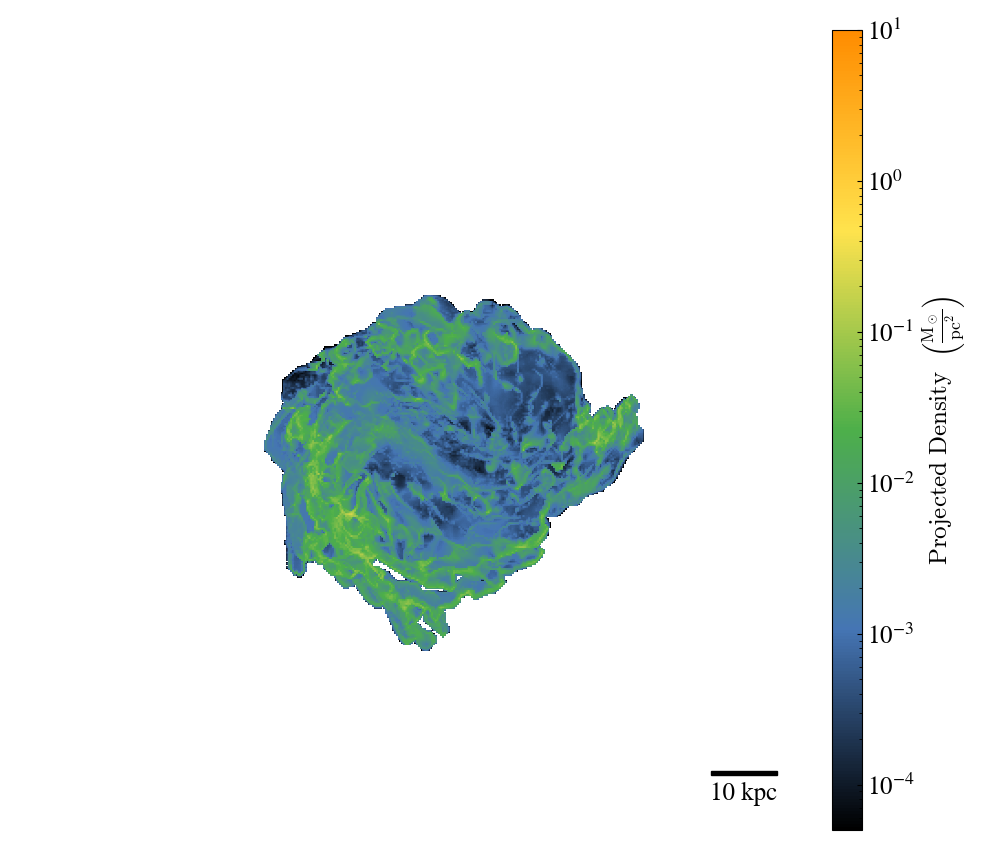

Loading Shell 3 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:53:43,097 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:53:50,510 Projection completed
yt : [INFO     ] 2025-01-24 15:53:50,510 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:50,510 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:50,511 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:53:50,511 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:53:50,512 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



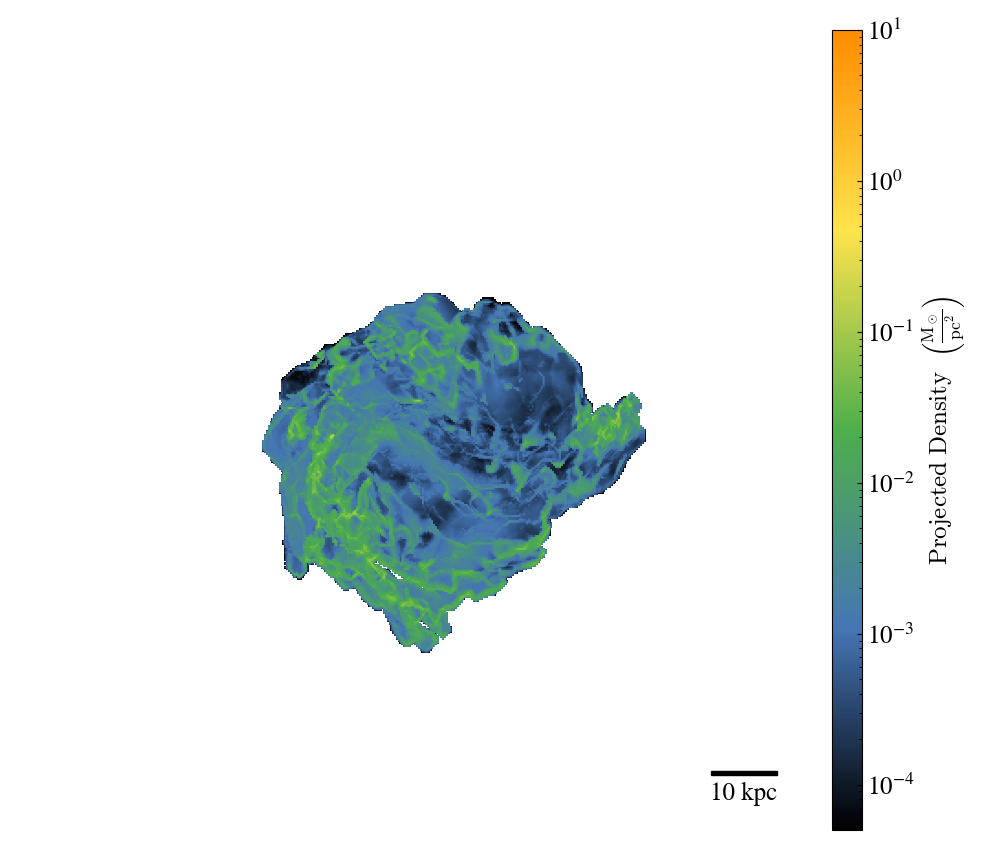

Loading Shell 4 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:54:00,549 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:54:07,674 Projection completed
yt : [INFO     ] 2025-01-24 15:54:07,675 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:07,675 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:07,676 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:07,676 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:07,676 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



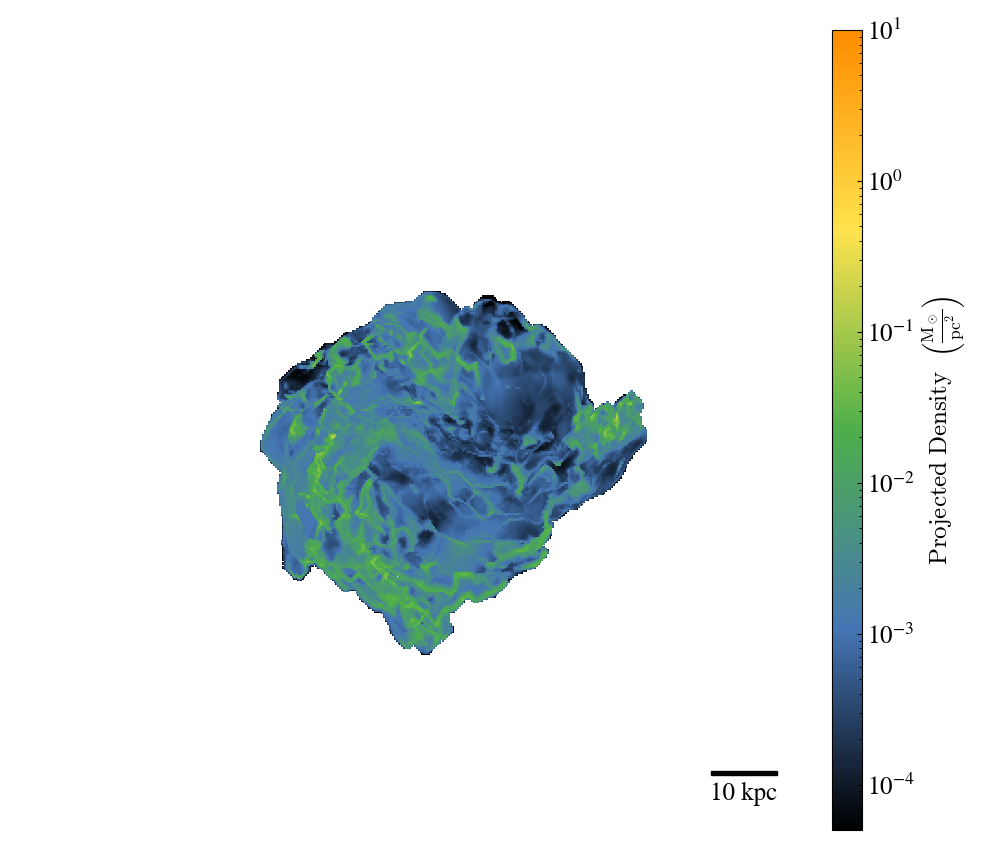

Loading Shell 5 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:54:17,451 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:54:24,812 Projection completed
yt : [INFO     ] 2025-01-24 15:54:24,812 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:24,812 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:24,813 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:24,813 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:24,814 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



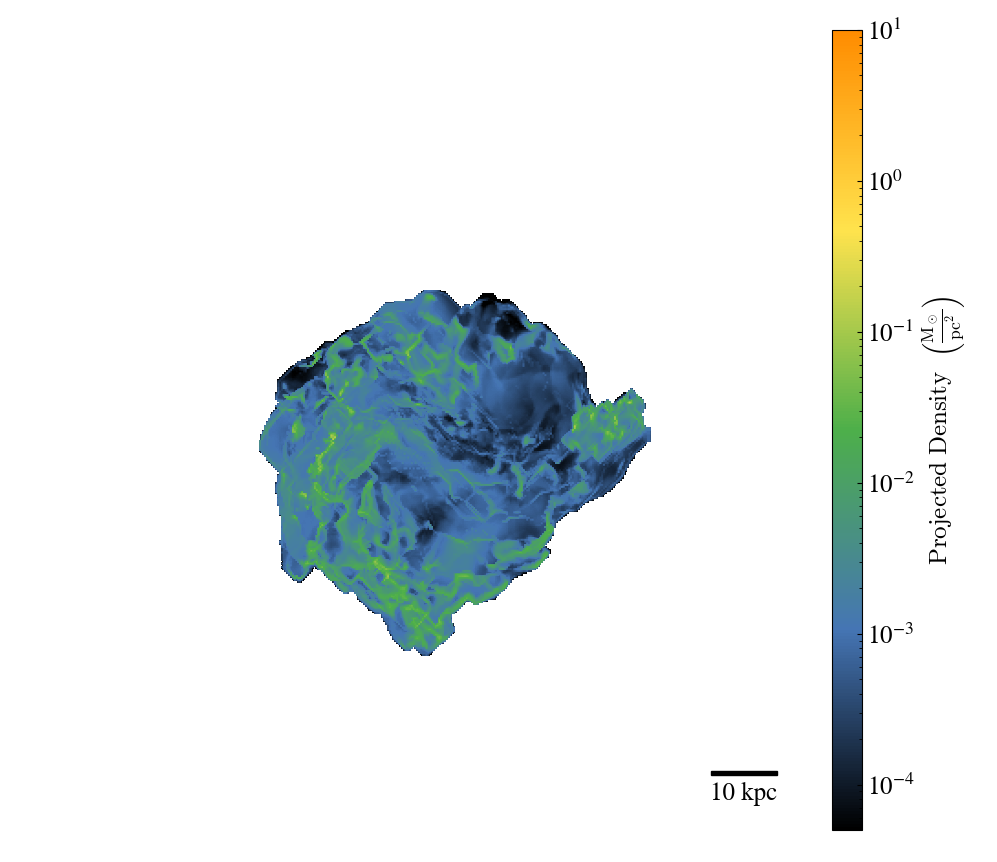

Loading Shell 6 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:54:35,050 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:54:42,486 Projection completed
yt : [INFO     ] 2025-01-24 15:54:42,486 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:42,487 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:42,488 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:42,488 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:42,488 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



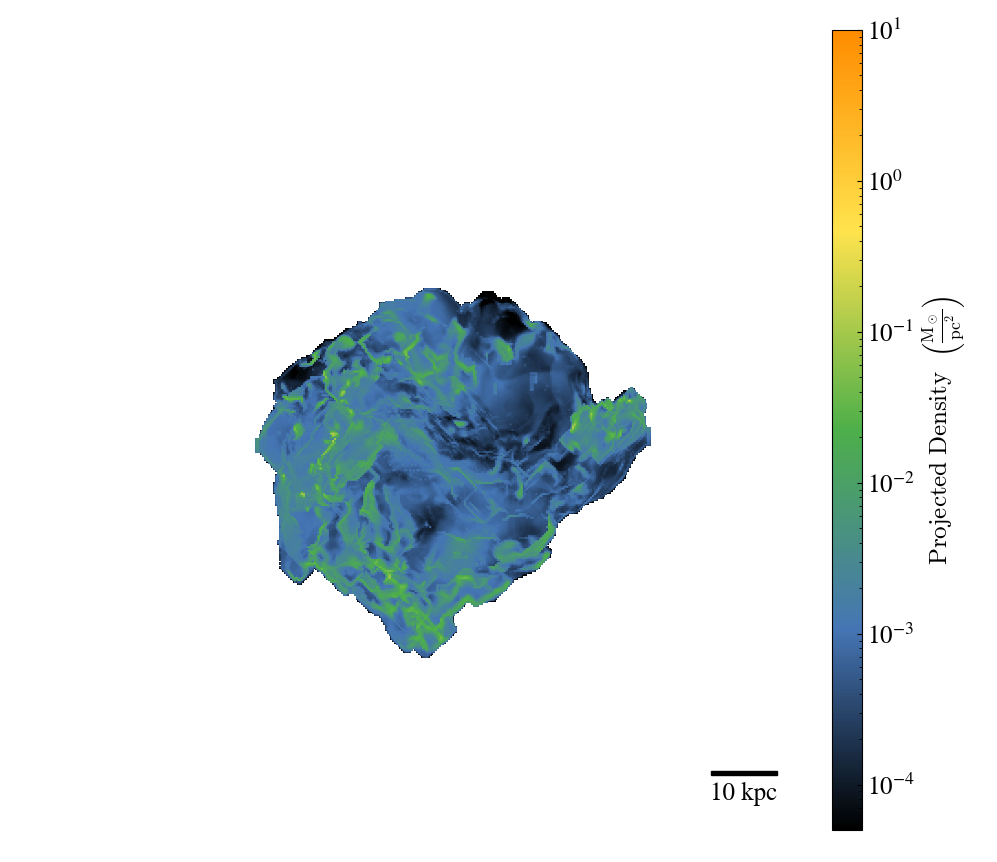

Loading Shell 7 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:54:52,731 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:54:59,968 Projection completed
yt : [INFO     ] 2025-01-24 15:54:59,968 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:59,968 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:59,969 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:54:59,969 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:54:59,969 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



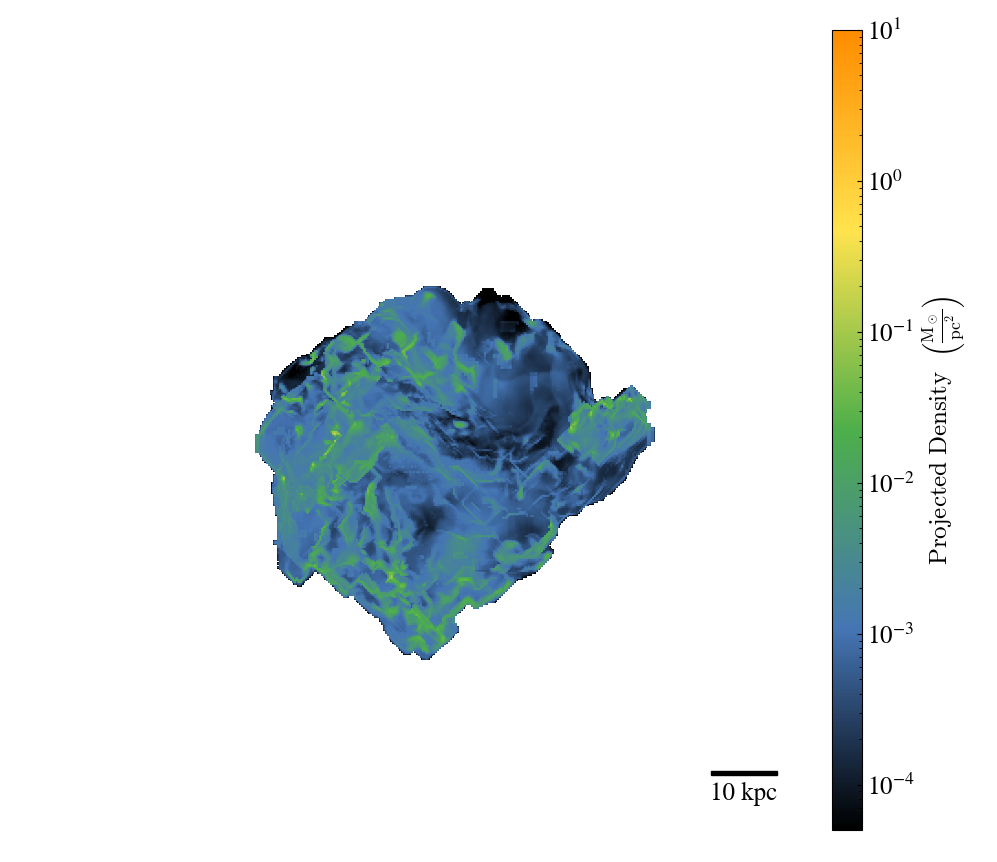

Loading Shell 8 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:55:10,027 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:55:17,387 Projection completed
yt : [INFO     ] 2025-01-24 15:55:17,387 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:55:17,387 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:55:17,388 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:55:17,388 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:55:17,389 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



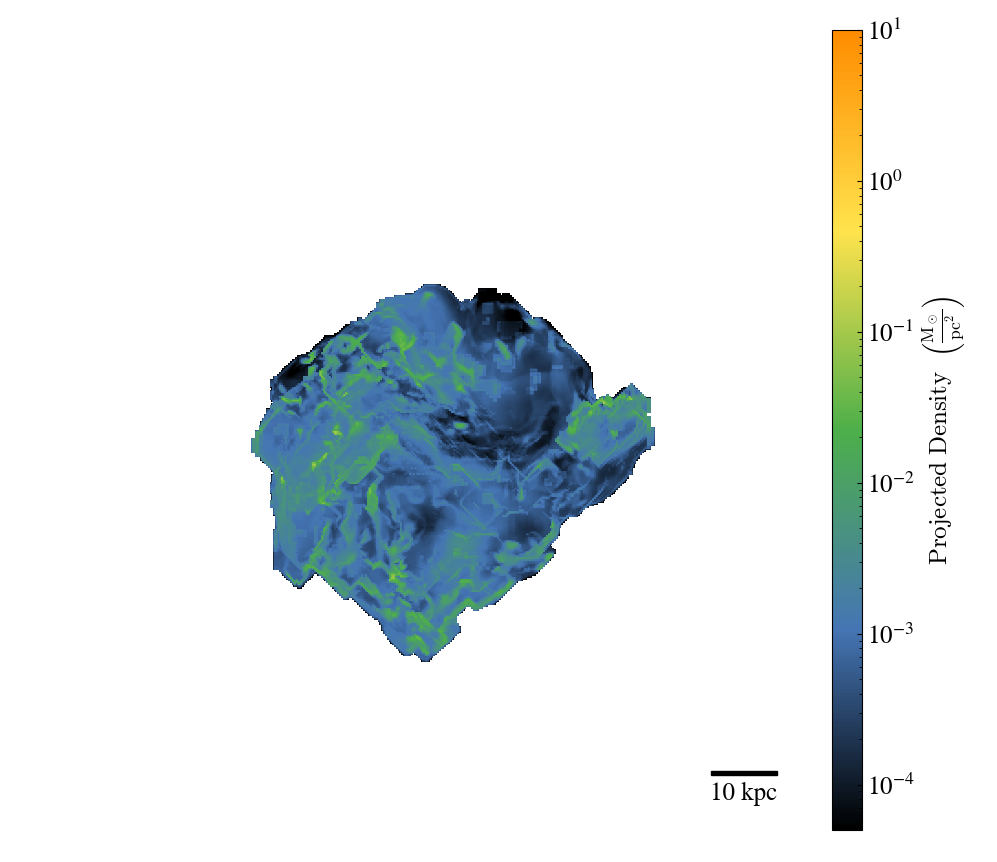

Loading Shell 9 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:151: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-01-24 15:55:27,445 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-01-24 15:55:34,775 Projection completed
yt : [INFO     ] 2025-01-24 15:55:34,776 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:55:34,776 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:55:34,777 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:55:34,777 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:55:34,777 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



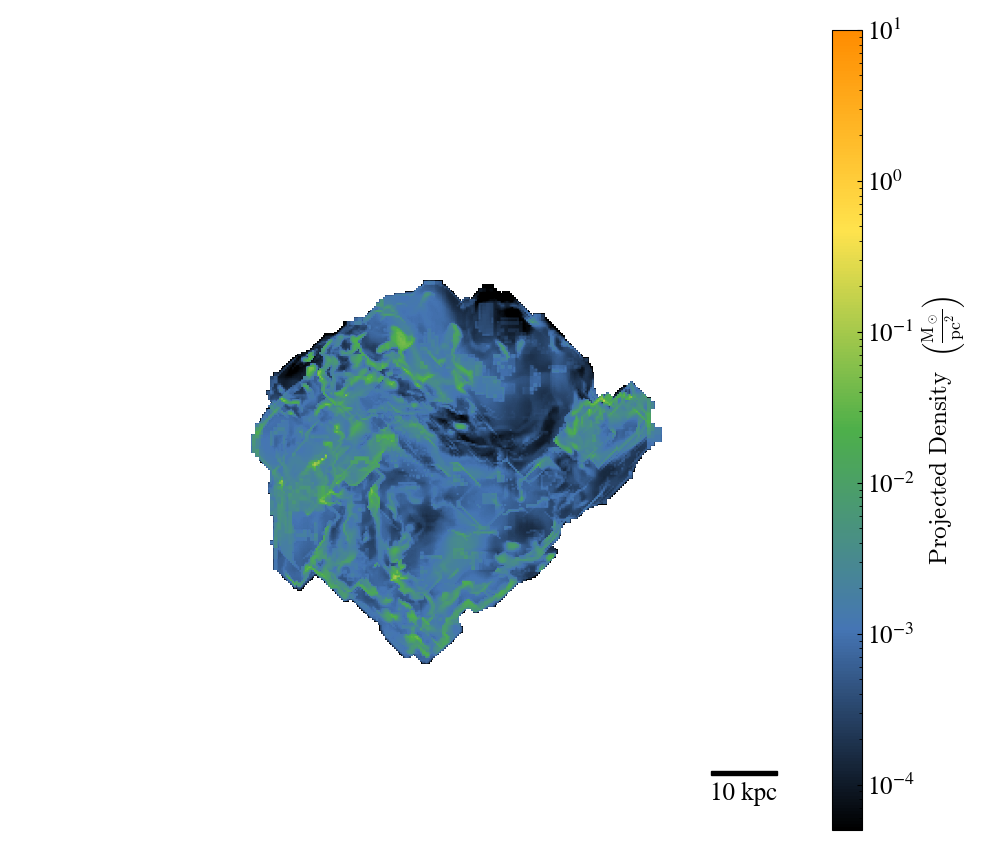

Combined Shells:


yt : [INFO     ] 2025-01-24 15:56:24,609 Projection completed
yt : [INFO     ] 2025-01-24 15:56:24,609 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:56:24,609 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:56:24,610 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:56:24,610 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:56:24,611 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



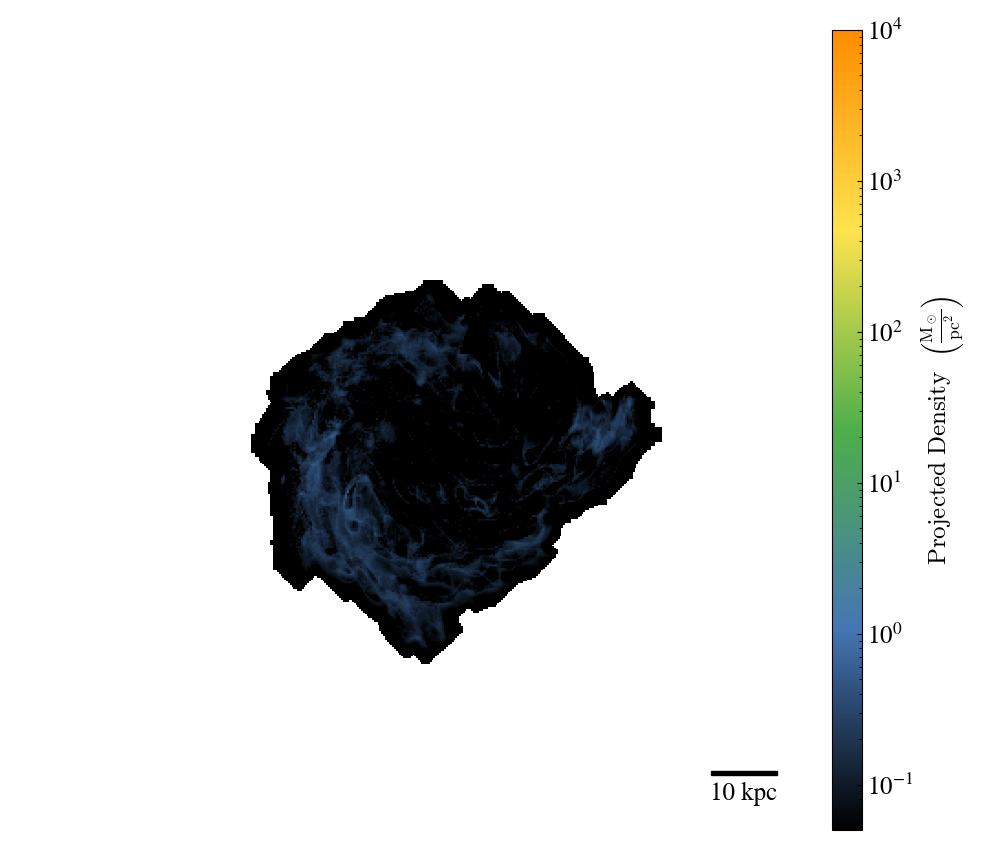

Dilated Disk:


yt : [INFO     ] 2025-01-24 15:57:12,883 Projection completed
yt : [INFO     ] 2025-01-24 15:57:12,883 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:57:12,883 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:57:12,884 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-01-24 15:57:12,884 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-01-24 15:57:12,885 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



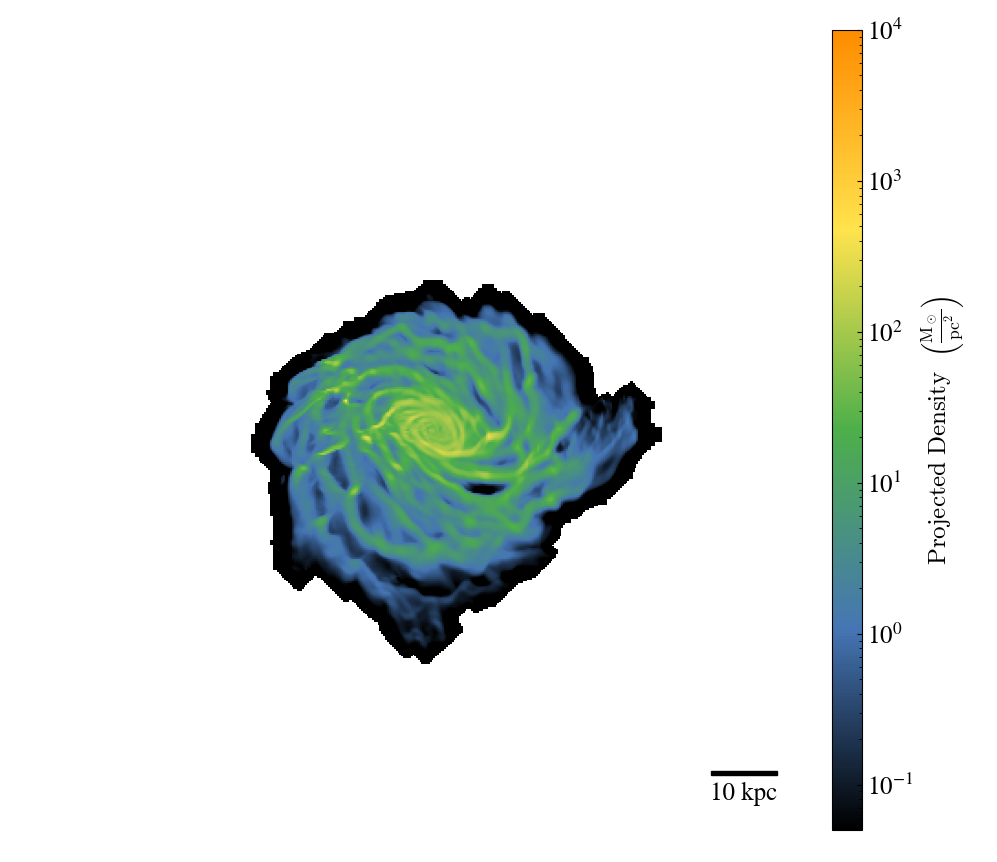

In [9]:
####Test using the shell and disk files generated####
from foggie.clumps.clump_finder.utils_clump_finder import load_clump
from foggie.clumps.clump_finder.utils_clump_finder import mask_clump

disk_file = args.output+"_Disk.h5"
shell_filebase = args.output+"_DiskDilationShell_n"
disk_cut = load_clump(ds, disk_file)


print("Original Disk:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

for i in range(0,args.n_dilation_iterations):
    print("Loading Shell",i,"...")
    shell_cut = load_clump(ds, shell_filebase+str(int(i))+".h5") #When loading multiple clumps, make sure to set the clump id or the cut regions will be overwritten


    p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=shell_cut, width=(120,'kpc'))
    p.set_cmap(('gas','density'),density_color_map)
    p.set_unit(('gas','density'),'Msun/pc**2')
    p.set_zlim(('gas','density'),density_proj_min/1000.,density_proj_max/1000.)
    #p.hide_colorbar()
    p.hide_axes()
    p.annotate_scale(size_bar_args={'color':'black'})
    p.show()

    if i==0:
        dilated_disk_cut = disk_cut + shell_cut
        combined_shell_cuts = shell_cut
    else:
        dilated_disk_cut = dilated_disk_cut + shell_cut
        combined_shell_cuts = combined_shell_cuts + shell_cut

print("Combined Shells:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=combined_shell_cuts, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


print("Dilated Disk:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=dilated_disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()
